In [1]:
%matplotlib inline

In [110]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [75]:
import numpy as np

# 0. Data

Source: https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data?resource=download

In [3]:
df = pd.read_csv("./data.csv")

In [4]:
sorted(df.columns)

['Coverage',
 'Customer',
 'Customer Lifetime Value',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy',
 'Policy Type',
 'Renew Offer Type',
 'Response',
 'Sales Channel',
 'State',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [5]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


# 1. Conversion Rate

In [6]:
df["conversion"] = df["Response"].apply(lambda x: 1 if x == "Yes" else 0)

## 1.1. Overall Conversion Rate

In [7]:
df["conversion"].mean()

0.14320122618786948

Text(0, 0.5, '')

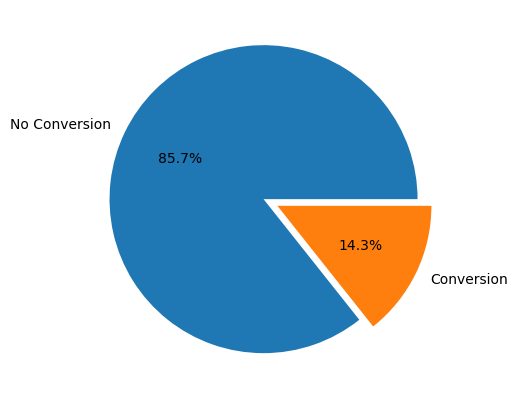

In [37]:
ax = df.groupby("conversion")["Customer"].count().reset_index().plot.pie(
    figsize=(5, 5),
    y="Customer",
    autopct='%1.1f%%',
    legend=False,
    labels=["No Conversion", "Conversion"],
    explode=[0.05, 0.05]
)
ax.set_ylabel(None)

## 1.2. Demographics and Conversion Rate

In [49]:
(df["Income"] == 0).sum(), df.shape[0]

(2317, 9134)

<Axes: >

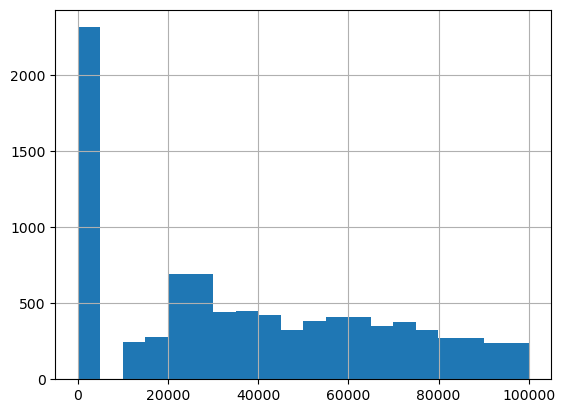

In [48]:
df["Income"].hist(bins=20)

In [61]:
df["income_category"] = df["Income"].apply(
    lambda x: 0 if x == 0 else x//10000
)

Text(0.5, 1.0, 'Conversion Rate across Reported Income')

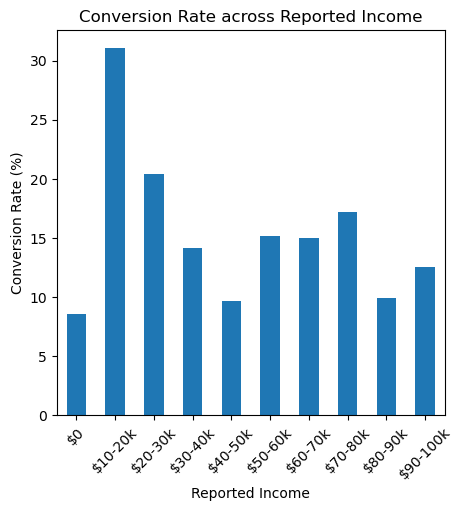

In [70]:
income_conversion = df.groupby("income_category")["conversion"].mean() * 100
ax = (
    income_conversion
).plot.bar(
    figsize=(5, 5),
    rot=45,
)
ax.set_xticklabels(["$0" if x == 0 else f"${x}0-{x+1}0k" for x in income_conversion.index])
ax.set_ylabel("Conversion Rate (%)")
ax.set_xlabel("Reported Income")
ax.set_title("Conversion Rate across Reported Income")

## 1.3. Sales Channel and Conversion Rate

Text(0.5, 1.0, 'Conversion Rate per Sales Channel')

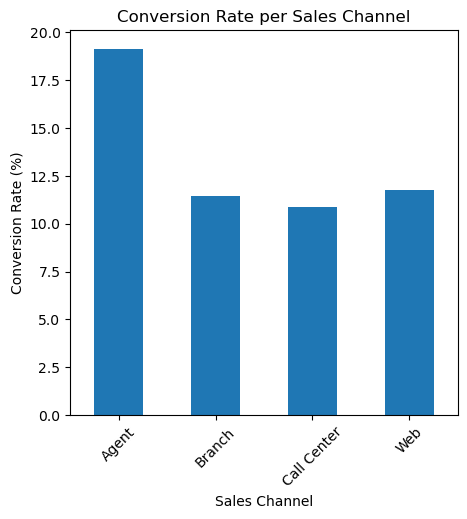

In [38]:
ax = (
    df.groupby("Sales Channel")["conversion"].mean() * 100
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.set_ylabel("Conversion Rate (%)")
ax.set_title("Conversion Rate per Sales Channel")

Text(0, 0.5, '')

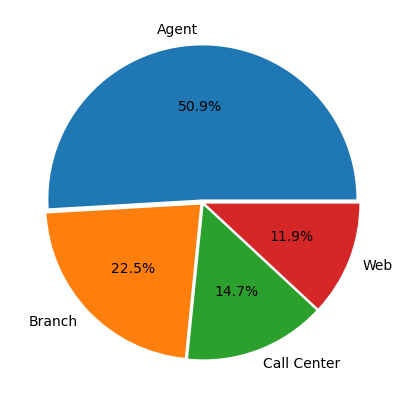

In [42]:
sales_channel_count = df.groupby("Sales Channel")["conversion"].sum()
ax = sales_channel_count.reset_index().plot.pie(
    figsize=(5, 5),
    y="conversion",
    autopct='%1.1f%%',
    legend=False,
    labels=sales_channel_count.index,
    explode=[0.02]*df["Sales Channel"].nunique()
)
ax.set_ylabel(None)

## 1.4. Promotions and Conversion Rate

In [45]:
df.groupby("Renew Offer Type")["conversion"].count()

Renew Offer Type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: conversion, dtype: int64

Text(0.5, 1.0, 'Conversion Rate per Promotion (Offer Type)')

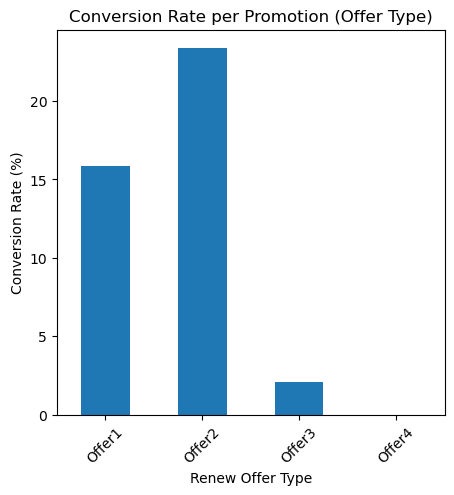

In [43]:
ax = (
    df.groupby("Renew Offer Type")["conversion"].mean() * 100
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.set_ylabel("Conversion Rate (%)")
ax.set_title("Conversion Rate per Promotion (Offer Type)")

Text(0, 0.5, '')

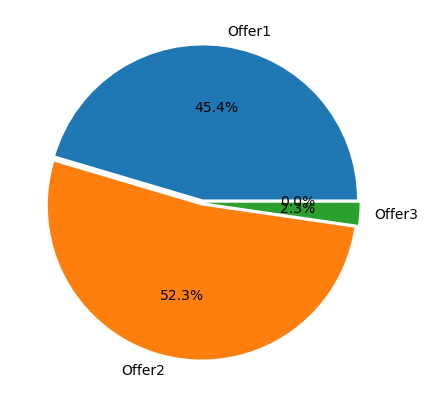

In [44]:
offer_count = df.groupby("Renew Offer Type")["conversion"].sum()
ax = offer_count.reset_index().plot.pie(
    figsize=(5, 5),
    y="conversion",
    autopct='%1.1f%%',
    legend=False,
    labels=offer_count.index,
    explode=[0.02]*offer_count.shape[0]
)
ax.set_ylabel(None)

# 2. Customer Lifetime Value (CLV)

## 2.1. Overall CLV

In [112]:
df["Customer Lifetime Value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

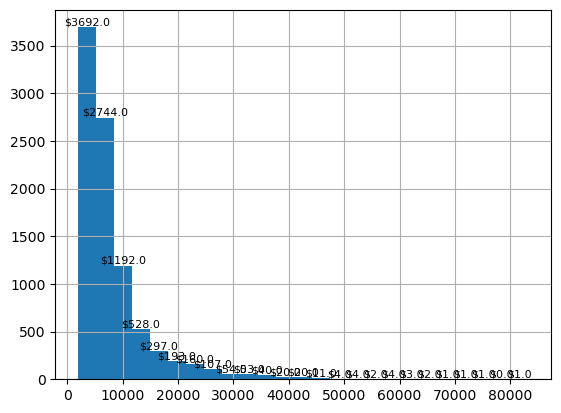

In [113]:
ax = df["Customer Lifetime Value"].hist(bins=25)
ax.bar_label(ax.containers[0], fmt='$%.1f', fontsize=8)
plt.show()

## 2.2. Geolocation and CLV

Text(0.5, 1.0, 'CLV per State')

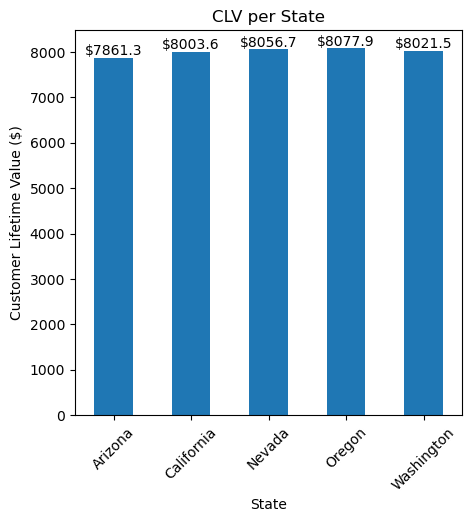

In [119]:
ax = df.groupby("State")["Customer Lifetime Value"].mean().plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f')
ax.set_ylabel("Customer Lifetime Value ($)")
ax.set_title("CLV per State")

In [120]:
df["Location Code"].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

Text(0.5, 1.0, 'CLV per State')

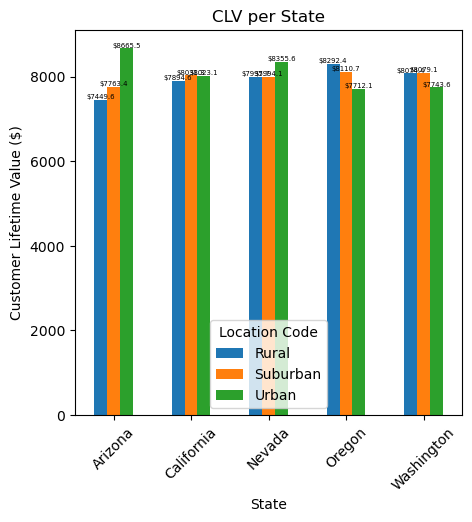

In [129]:
ax = df.groupby(["State", "Location Code"])["Customer Lifetime Value"].mean().unstack().plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f', fontsize=5)
ax.bar_label(ax.containers[1], fmt='$%.1f', fontsize=5)
ax.bar_label(ax.containers[2], fmt='$%.1f', fontsize=5)
ax.set_ylabel("Customer Lifetime Value ($)")
ax.set_title("CLV per State")

## 2.3. Product and CLV

Text(0.5, 1.0, 'CLV per Product')

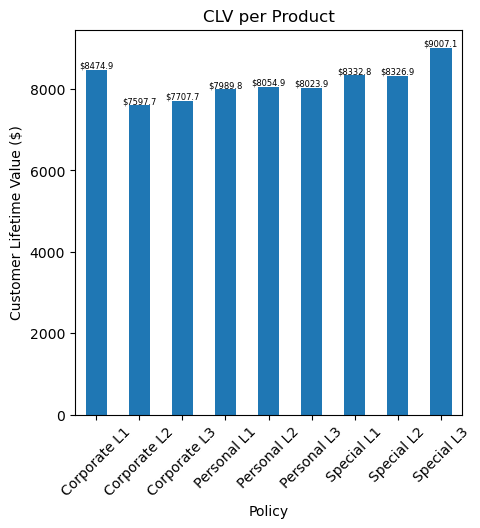

In [134]:
ax = df.groupby("Policy")["Customer Lifetime Value"].mean().plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f', fontsize=6)
ax.set_ylabel("Customer Lifetime Value ($)")
ax.set_title("CLV per Product")

# 3. Cost per Acquisition (CPA)

In [78]:
cost_distr = {
    "Agent": {"avg": 200, "std": 40},
    "Branch": {"avg": 85, "std": 17},
    "Call Center": {"avg": 30, "std": 6},
    "Web": {"avg": 2, "std": 0.5}
}

In [80]:
df["est_acquisition_cost"] = df["Sales Channel"].apply(
    lambda x: np.random.normal(cost_distr[x]["avg"], cost_distr[x]["std"], 1)[0]
)

In [82]:
df["est_acquisition_cost"].describe()

count    9134.000000
mean      106.349839
std        83.081989
min         0.458185
25%        30.941641
50%        87.969015
75%       184.168216
max       340.036821
Name: est_acquisition_cost, dtype: float64

## 3.1. Overall CPA

In [83]:
campaign_cost = df["est_acquisition_cost"].sum() / df["conversion"].sum()
campaign_cost

742.6601161833479

## 3.2. Sales Channel and CPA

In [87]:
channel_cpa = df.groupby("Sales Channel")["est_acquisition_cost"].sum() / df.groupby("Sales Channel")["conversion"].sum()

Text(0.5, 1.0, 'CPA per Sales Channel')

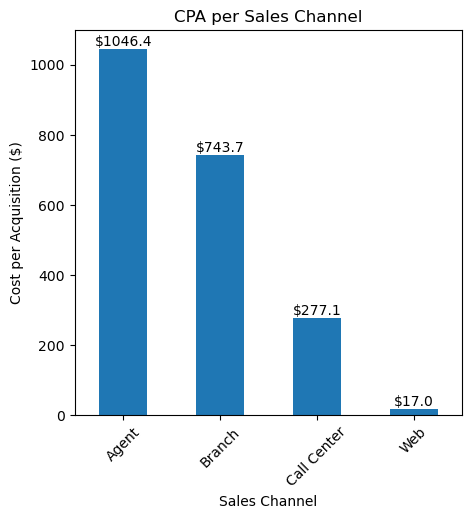

In [97]:
ax = (
    channel_cpa
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f')
ax.set_ylabel("Cost per Acquisition ($)")
ax.set_title("CPA per Sales Channel")

## 3.3. Promotions and CPA

In [99]:
promo_cpa = df.groupby("Renew Offer Type")["est_acquisition_cost"].sum() / df.groupby("Renew Offer Type")["conversion"].sum()

Text(0.5, 1.0, 'CPA per Promotion')

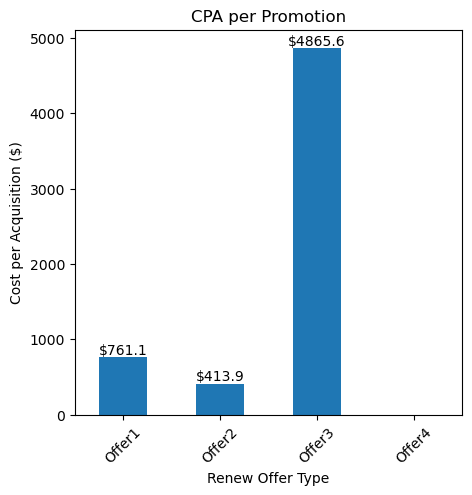

In [100]:
ax = (
    promo_cpa
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f')
ax.set_ylabel("Cost per Acquisition ($)")
ax.set_title("CPA per Promotion")

# 4. Return on Investment (ROI)

## 4.1. Overall ROI

In [162]:
campaign_cost = df["est_acquisition_cost"].sum()
converted_clv = (df["Customer Lifetime Value"] * df["conversion"]).sum()
converted_clv, campaign_cost

(10274171.740613999, 971399.4319678191)

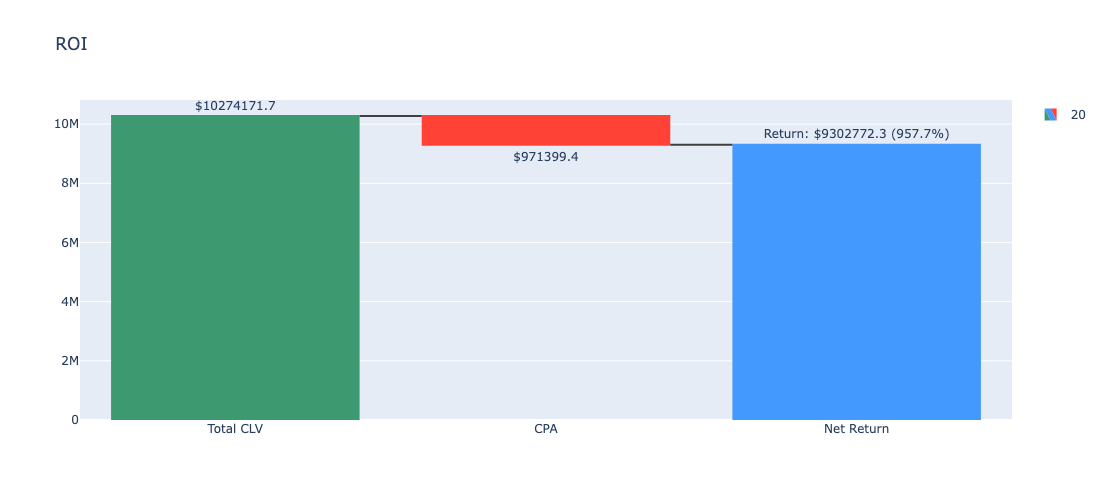

In [164]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Waterfall(
        name = "20", 
        orientation = "v",
        measure = ["relative", "relative", "total"],
        x = ["Total CLV", "CPA", "Net Return"],
        textposition = "outside",
        text = [
            f"${converted_clv:.01f}", 
            f"${campaign_cost:.01f}", 
            f"Return: ${converted_clv-campaign_cost:.1f} ({(converted_clv-campaign_cost)/campaign_cost*100:.01f}%)"
        ],
        y = [converted_clv, -campaign_cost, 0],
        connector = {"line":{"color":"rgb(63, 63, 63)"}},
    )
)

fig.update_layout(
    height=500,
    width=500,
    title = "ROI",
    showlegend = True
)

fig.show()


## 4.2. ROI per Sales Channel

In [166]:
df["return"] = (df["Customer Lifetime Value"]*df["conversion"]) - df["est_acquisition_cost"]

In [169]:
channel_roi = df.groupby("Sales Channel")["return"].sum() / df.groupby("Sales Channel")["est_acquisition_cost"].sum()

In [170]:
channel_roi

Sales Channel
Agent            6.299341
Branch          10.090347
Call Center     27.903804
Web            461.376281
dtype: float64

Text(0.5, 1.0, 'ROI per Sales Channel')

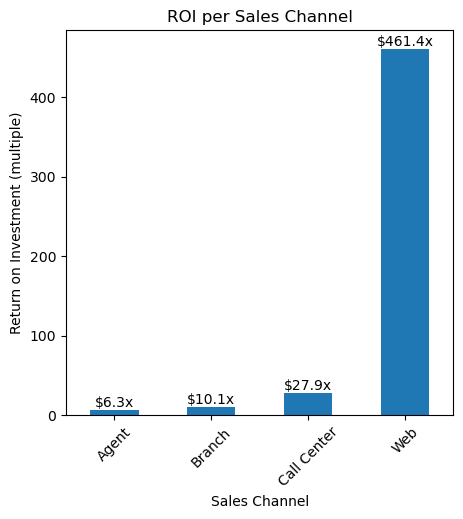

In [172]:
ax = (
    channel_roi
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1fx')
ax.set_ylabel("Return on Investment (multiple)")
ax.set_title("ROI per Sales Channel")

## 4.3. ROI per Promotions

In [166]:
df["return"] = (df["Customer Lifetime Value"]*df["conversion"]) - df["est_acquisition_cost"]

In [174]:
promo_roi = df.groupby("Renew Offer Type")["return"].sum() / df.groupby("Renew Offer Type")["est_acquisition_cost"].sum()

In [175]:
promo_roi

Renew Offer Type
Offer1    10.696637
Offer2    15.860076
Offer3     0.460458
Offer4    -1.000000
dtype: float64

Text(0.5, 1.0, 'ROI per Promotion')

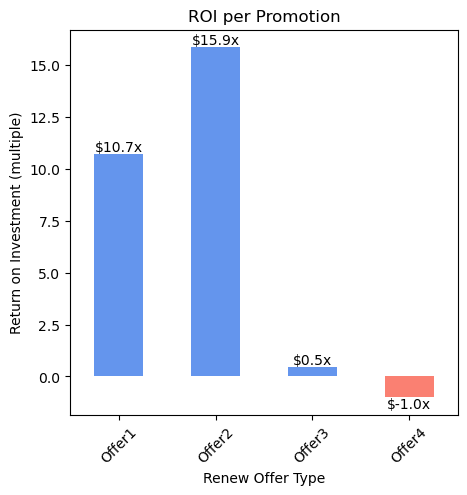

In [181]:
ax = (
    promo_roi
).plot.bar(
    figsize=(5, 5),
    rot=45,
    color=(promo_roi > 0).map({True: 'cornflowerblue', False: 'salmon'})
)
ax.bar_label(ax.containers[0], fmt='$%.1fx')
ax.set_ylabel("Return on Investment (multiple)")
ax.set_title("ROI per Promotion")